## **Neural network model to classify images of clothing, such as sneakers and t-shirts** [Link](https://www.tensorflow.org/tutorials/keras/classification?hl=it)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


### **Import the Fashion MNIST dataset**
Fashion MNIST which contains **70,000 grayscale images in 10 categories**.
The images show individual items of clothing at **low resolution (28 x 28 pixels)**, as seen here:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
import pandas as pd

train_df = pd.DataFrame({
    'Label': train_labels,
    'Image Shape': [img.shape for img in train_images]
})

train_df.head(10)

,Label,Image Shape
0,9,"(28, 28)"
1,0,"(28, 28)"
2,0,"(28, 28)"
3,3,"(28, 28)"
4,0,"(28, 28)"
5,2,"(28, 28)"
6,7,"(28, 28)"
7,2,"(28, 28)"
8,5,"(28, 28)"
9,5,"(28, 28)"


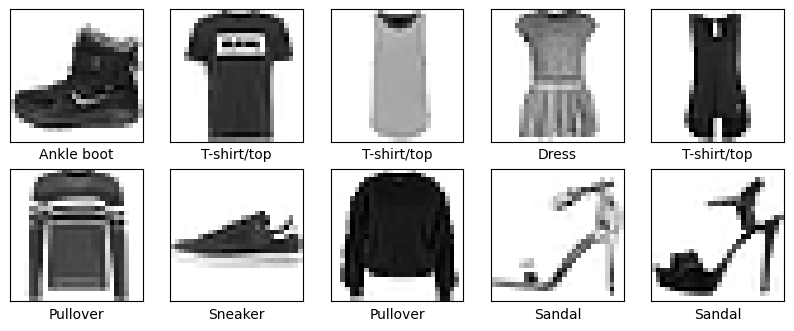

In [4]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Explore the data**
Let’s look at the **format of the dataset before training the model**. 
The following shows that there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
train_images.shape
# 60000 images, 28*28

(60000, 28, 28)

In [6]:
# labels
len(train_labels)

60000

In [7]:
# Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape
# 10000 and 28*28

(10000, 28, 28)

In [9]:
# labels
len(train_labels)

60000

## **Preprocess the data**
The **data must be preprocessed before training the network**. If you look at the **first image in the training set**, you will see that **the pixel values ​​fall in the range of 0 to 255**:

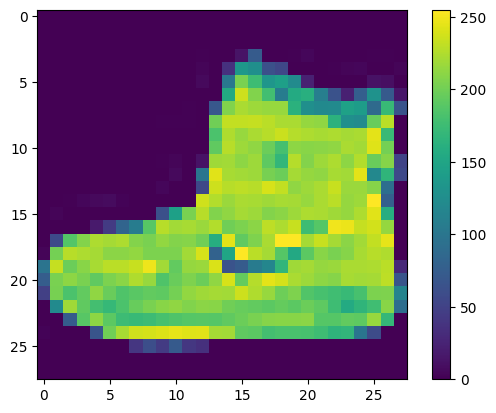

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### **Scale these values ​​to a range of 0 to 1 before feeding them to the neural network model**. To do this, **divide the values ​​by 255**. It is **important that the training set and the test set are preprocessed in the same way**:

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### **To verify that the data is in the correct format** and that you are ready to build and train the network, we **display the first 9 images from the training set** and show the class name under each image.

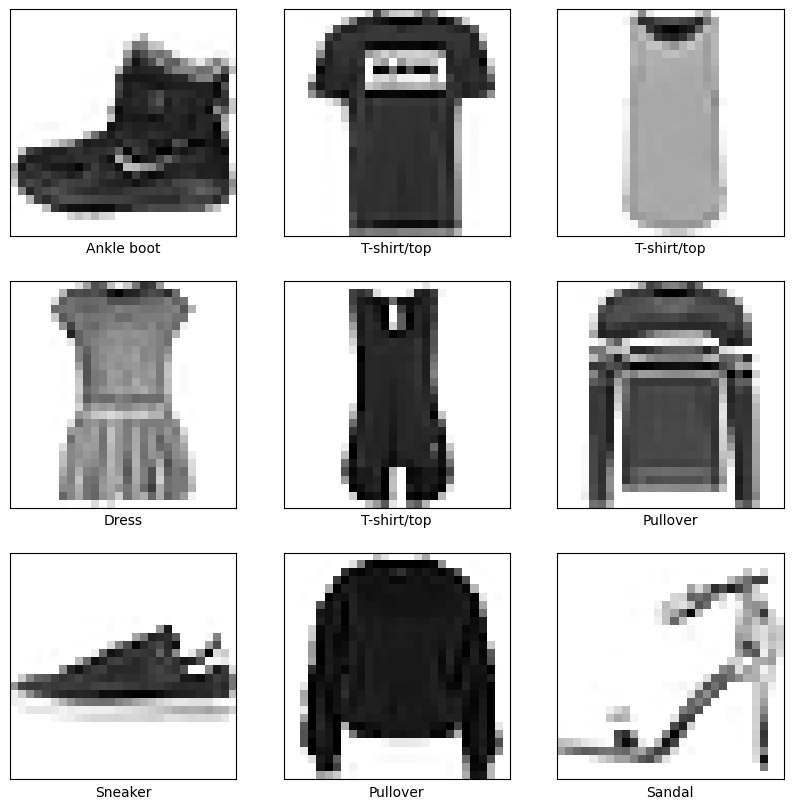

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Build the model**
**Building the neural network involves setting up the model layers**, then compiling the model.

- **Prepare the layers**
The **basic building block of a neural network is the layer**. 
**Layers extract representations from the data fed into them**. Hopefully, these representations are meaningful to the problem at hand.

Most **deep learning** is about **chaining simple layers together**. Most layers, such as **tf.keras.layers.Dense** , have parameters that are learned during training.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10)
])

### **The first layer of this network**, **tf.keras.layers.Flatten** , transforms the image format **from a two-dimensional matrix (of 28 x 28 pixels)** to a **one-dimensional matrix (of 28 * 28 = 784 pixels)**. Think of this layer as unstacking rows of pixels in the image and aligning them. This layer has no parameters to learn; it just reformats the data.

### **After the pixels are flattened**, the **network consists of a sequence of two tf.keras.layers.Dense layers**. These are **densely connected or fully connected neural layers**. The first Dense layer has **128 nodes (or neurons)**. **The second (and final) layer returns a logit array with length 10**. Each node contains a score indicating that the current image belongs to one of 10 classes.

In [14]:
model.compile()

### **Compile the model**
**Before the model is ready to train**, there are a few more settings that are needed. These are added during the model build phase:

* **Loss function**: This **measures the accuracy of the model during training**. You want to **minimize this function** to “steer” the model in the right direction.
* **Optimizer**: This is **how the model is updated based on the data** it sees and its **loss function**.
* **Metrics**: These are used to **monitor the training and testing phases**. The following example uses precision, the fraction of images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## **Training the neural network model requires the following steps**:

- **Send training data to the model**. In this example, the training data is located in the train_images and train_labels arrays.
- The **model learns to associate images** and labels.
- **Ask the model to make predictions** on a test set, in this example the array test_images .
- **Verify that the predictions match** the labels in the array test_labels .

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7844 - loss: 0.6237
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8615 - loss: 0.3817
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3361
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3115
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.2977
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8997 - loss: 0.2713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9004 - loss: 0.2655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.2565
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9084 - loss: 0.2425
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9130 - loss: 0.2312


As the model trains, **loss and accuracy metrics are displayed**. This model achieves an **accuracy of approximately 0.91 (or 91%)** on the training data.

### **Evaluate accuracy**
Then, **compare the model's performance** on the **test dataset**:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8812 - loss: 0.3385

Test accuracy: 0.8812000155448914


It turns out that the accuracy of the test dataset is slightly lower than the accuracy of the training dataset. This **gap** between the accuracy of the training and the accuracy of the test represents an **overfitting**. **Overfitting** occurs when a **machine learning model performs worse with new and previously unseen inputs** than the training data. An **oversized model "stores" noise** and detail in the training dataset to the point where it negatively impacts the model's performance on new data.

## **Making predictions**
With the **trained model**, you can use it to **make predictions about some images**. Attach a **softmax layer** to convert the linear outputs of the model - logit - **into probabilities**, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Here, the template has predicted the label for each image in the test set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([1.8669217e-11, 1.0010016e-12, 1.1185148e-15, 3.8122294e-13,
       1.6131139e-12, 4.6133008e-04, 1.4092263e-11, 2.5507241e-02,
       7.1213779e-10, 9.7403145e-01], dtype=float32)

A f**orecast is a matrix of 10 numbers**. They represent the **model's "confidence" that the image matches** each of the 10 different pieces of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

np.int64(9)

Draw this chart to examine the complete set of 10 class predictions.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

- **Check the forecasts**
With the **trained model**, you can use it to **make predictions** about some images.

Let's take a look at **image 0**, **forecasts**, and **forecast array**. **Correct prediction labels are blue** and **incorrect prediction labels are red**. The number provides the percentage (out of 100) for the expected label.

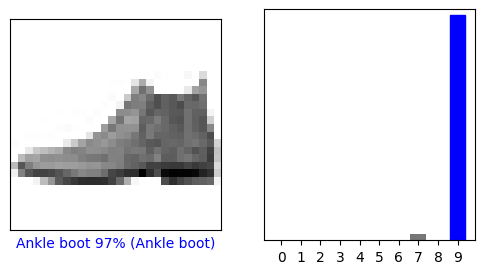

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()